In [35]:
# R: clustering analysis
library(ggplot2)
library(factoextra)     # fviz_nbclust
library(cluster)          # silhoutte()
library(vegan)
library(lattice)
library(GGally)
data<-read.csv("../input/Iris.csv",header=T,sep=",")

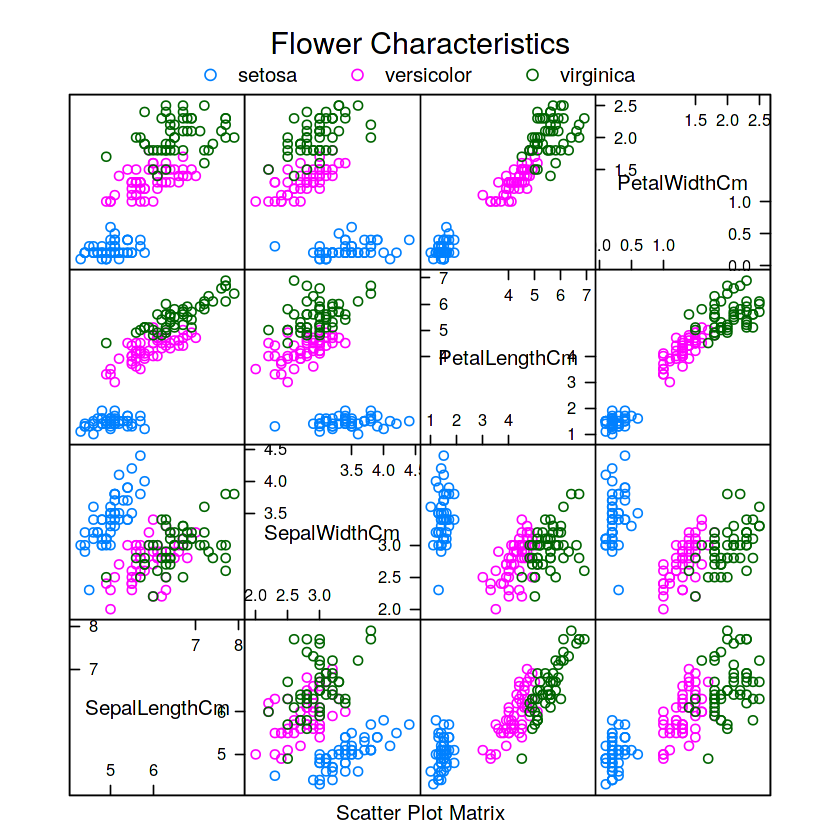

In [36]:
# scatter plot of the iris dataset
super.sym <- trellis.par.get("superpose.symbol")
splom(~data[2:5],groups=Species,data=data,panel=panel.superpose,
      key=list(title="Flower Characteristics",columns=3,points=list(pch=super.sym$pch[1:3],
      col=super.sym$col[1:3]),text=list(c("setosa","versicolor","virginica"))))

Warning message:
“Ignoring unknown aesthetics: fill”Warning message:
“Ignoring unknown aesthetics: fill”Warning message:
“Ignoring unknown aesthetics: fill”Warning message:
“Ignoring unknown aesthetics: fill”Warning message:
“Ignoring unknown aesthetics: fill”Warning message:
“Ignoring unknown aesthetics: fill”

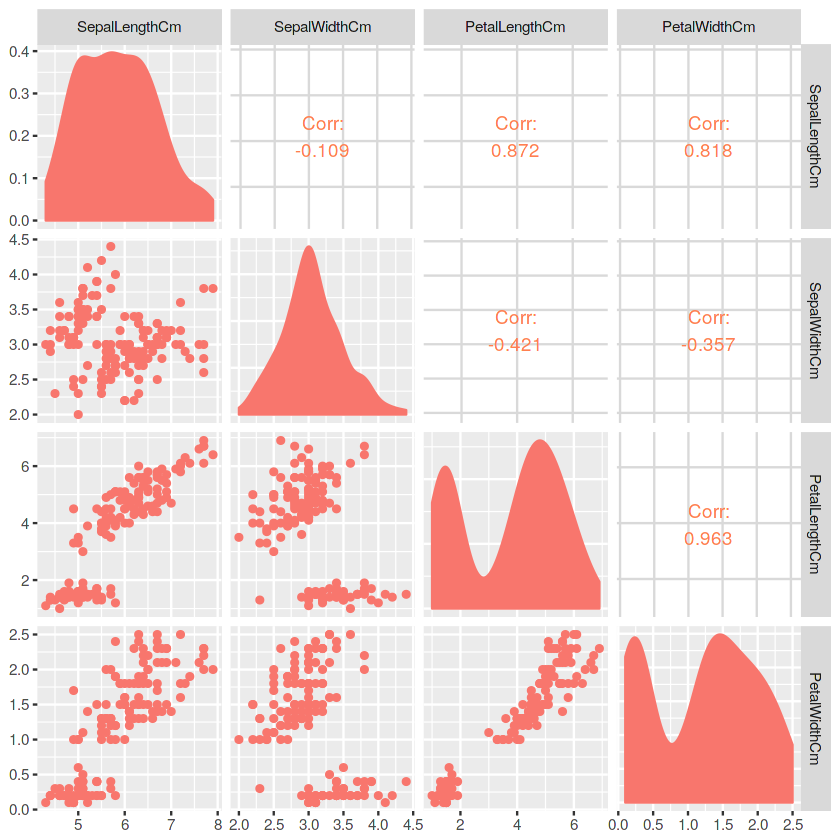

In [46]:
# pairwise correlation
ggpairs(data[2:5],mapping=ggplot2::aes(colour="coral",fill="coral"))

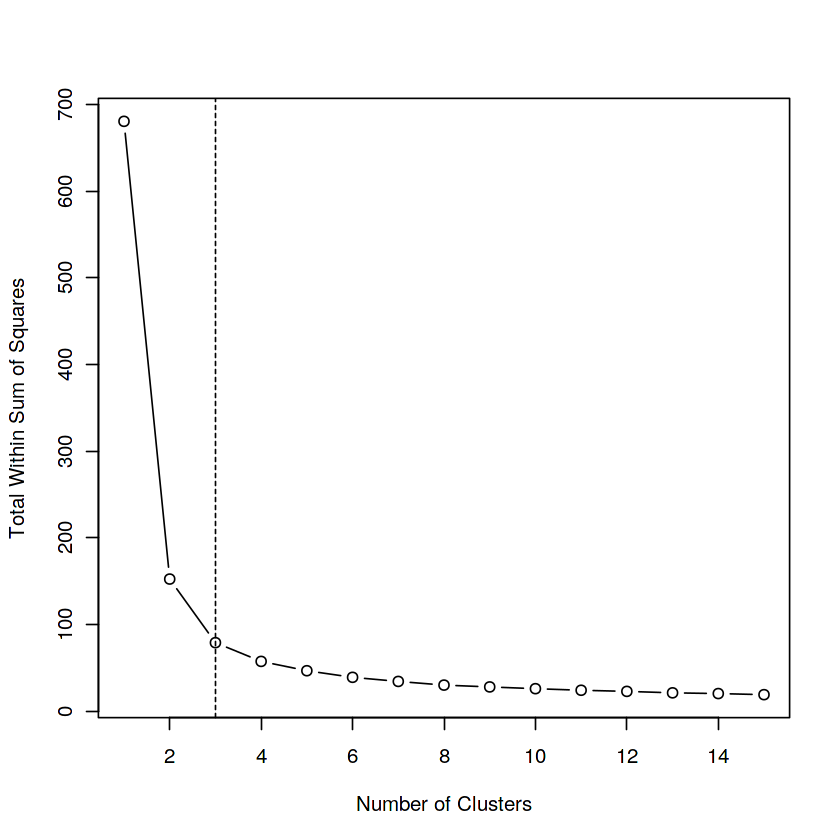

In [39]:
# Elbow method
k<-list()
for(i in 1:15){k[[i]]<-kmeans(data[,2:5],i,nstart=25)$withinss}
wss<-sapply(k,sum)
plot(x=1:15,y=wss,type="b",ylab="Total Within Sum of Squares",xlab="Number of Clusters")
abline(v=3,lty=2)

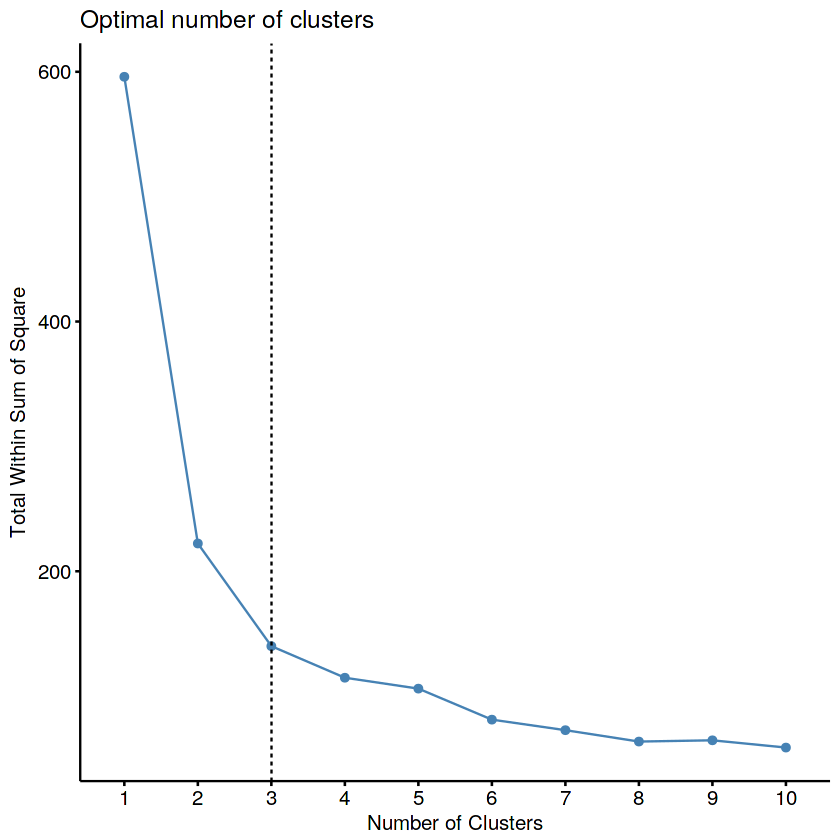

In [40]:
# Shorter code
fviz_nbclust(scale(data[2:5]),kmeans,method="wss")+xlab("Number of Clusters")+geom_vline(xintercept=3,linetype=2)

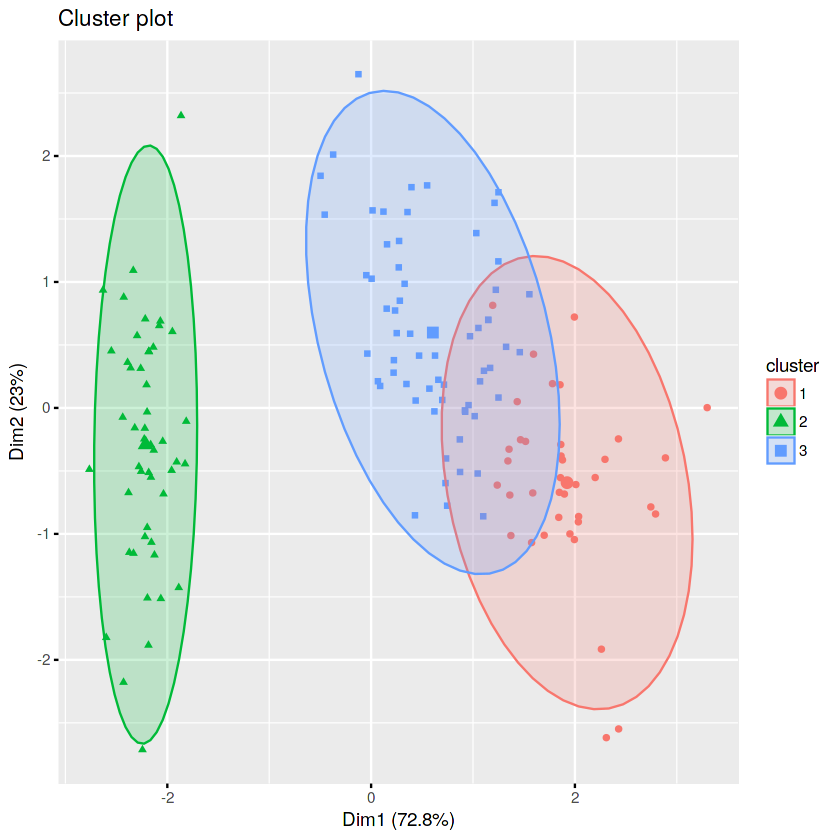

In [41]:
# KMeans with 3 clusters
k_means1.pred<-kmeans(data[,2:5],3,nstart=25)
fviz_cluster(k_means1.pred, data=scale(data[,2:5]),geom="point",stand=FALSE,ellipse.type="norm")

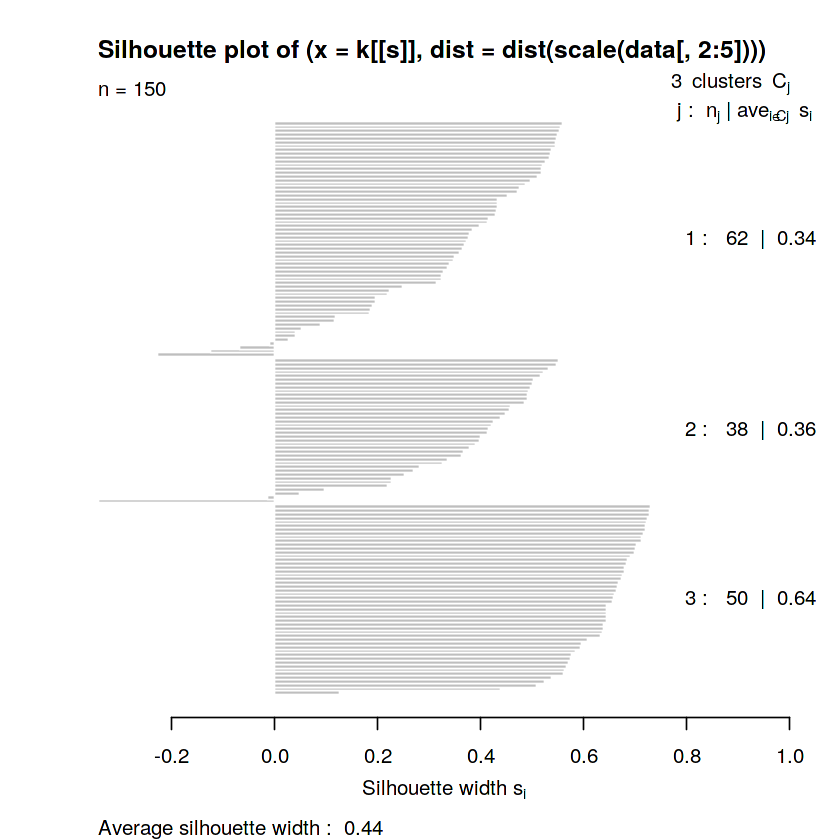

In [33]:
# Silhouette Method
sil<-list()
for(s in 1:15){k[[s]]<-kmeans(data[,2:5],s,nstart=25)$cluster}
for(s in 1:15){sil[[s]]<-silhouette(k[[s]], dist(scale(data[,2:5])))}
plot(sil[[3]])

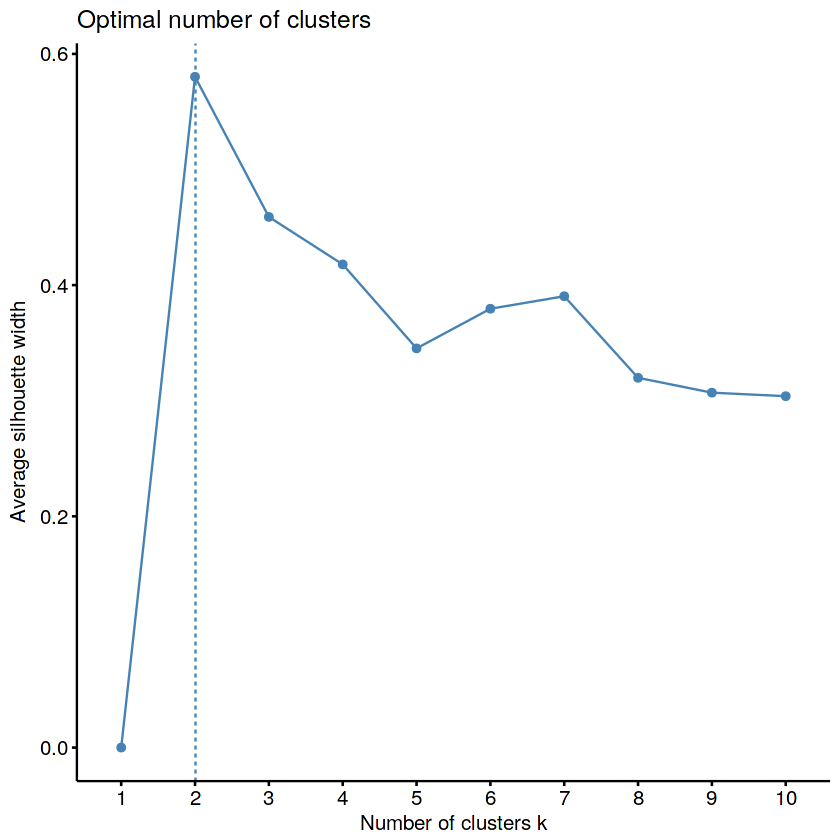

In [34]:
# Find the Maximum silhouette width for different k values
fviz_nbclust(scale(data[2:5]),kmeans,method = "silhouette")